<a href="https://colab.research.google.com/github/deepakbharti21/salary-prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## salary *prediction*

 
**Problem Statement**

**Predict the salary if the employee using the features provided in the data.**

In [61]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
salary_df = pd.read_csv("/content/drive/MyDrive/personal Capstone/dataset.csv")           #data file from dive

In [35]:
salary_df.head()          #dataset view


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


##Step 3: Conversion of Column Datatype


Some columns require conversion to appropriate datatypes to make analysis easier and more accurate.


In [37]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [39]:
salary_df.describe()


,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [40]:
df1 = salary_df.copy()

In [11]:
df1['salary'].unique()


array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [41]:
df1['yrs.since.phd'].unique()


array([19, 20,  4, 45, 40,  6, 30, 21, 18, 12,  7,  1,  2, 38, 37, 39, 31,
       36, 34, 24, 13, 35,  5, 11, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,
        3, 33, 17, 29, 26, 43, 15, 42, 32, 54, 56, 27, 48, 46, 47, 52, 51,
       49, 44])

In [43]:
df1['yrs.service'].unique()


array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 36, 26, 31,
       30, 19,  4,  9, 21, 27, 38, 15, 28, 25, 11,  5, 12, 17, 14, 37,  7,
       10, 29, 32, 22, 49, 57, 24, 53, 33, 40, 35, 43, 44, 48, 46, 51, 13,
       60])

In [44]:
#Step 1: Removing duplicate rows if any
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(4, 6)

In [45]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [46]:
df1.shape


(393, 6)

In [47]:
df1.isnull().sum().sort_values(ascending = False)[:6] # Columns having missing values.


rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [48]:
df1['yrs.since.phd'].fillna(df1['yrs.since.phd'].mean(), inplace = True)

In [19]:
df1['yrs.service'].fillna('yrs.service', inplace = True)

In [49]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

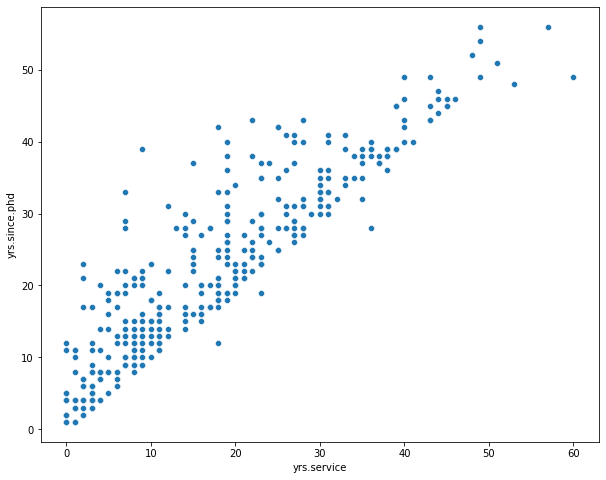

In [50]:
plt.figure(figsize = (10,8))
sns.scatterplot(y = 'yrs.since.phd', x = 'yrs.service', data = df1)
plt.show()

In [51]:
salary_df.corr()


,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [68]:
X = salary_df['yrs.since.phd']
y = salary_df['yrs.service']
Z = salary_df['salary']

In [72]:
X_train,X_test,y_train, y_test,Z_train,Z_test = train_test_split(X,y,Z, train_size = 0.7, test_size = 0.3, random_state = 100)


In [73]:
X_train.shape


(277,)

In [58]:
X_test.shape


(120,)

In [74]:
Z_train.shape


(277,)

In [62]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            yrs.service   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.69e-107
Time:                        18:37:32   Log-Likelihood:                -856.42
No. Observations:                 277   AIC:                             1717.
Df Residuals:                     275   BIC:                             1724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.8338      0.646     -4.389

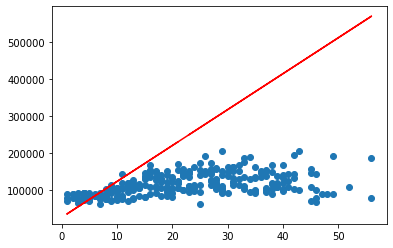

In [76]:
# Let us show the line fitting:
plt.scatter(X_train,Z_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

## Residual analysis:


In [77]:
y_train_pred = model.predict(X_train_sm)


In [78]:
y_train_pred.head()


47     18.411538
278    19.335250
216    11.021843
396     4.555859
120    10.098131
dtype: float64

In [80]:
residual = (y_train - y_train_pred)


In [81]:
residual.head()


47     0.588462
278   -1.335250
216   -0.021843
396   -0.555859
120    3.901869
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


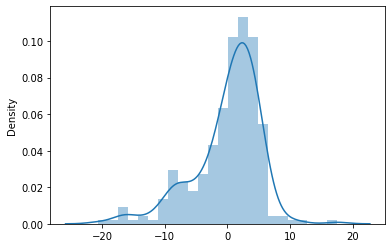

In [82]:
sns.distplot(residual)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


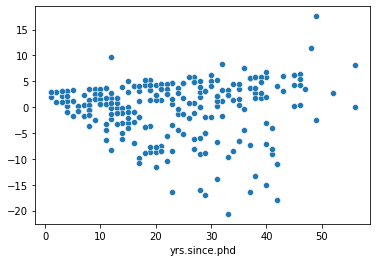

In [83]:
sns.scatterplot(X_train,residual)


##Predictions on the test data:


In [84]:
X_test_sm = sm.add_constant(X_test)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [86]:
y_pred = model.predict(X_test_sm)


## Root mean squared error:


In [87]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE


5.55987708807909

## **R2 Score**

In [88]:
r2_score(y_test,y_pred)


0.8232828611886789

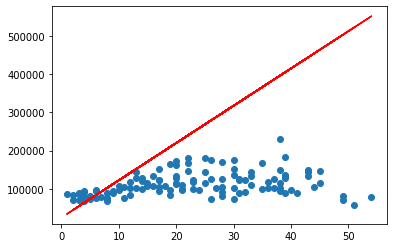

In [92]:
# Let us show the line fitting:
plt.scatter(X_test,Z_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()
